# Catagorise a SMS as a SPAM/HAM message using Python


Dataset is present at Kaggle:
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, 
tagged acording being ham (legitimate) or spam.
https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [94]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [88]:
#get data
dataset=pd.read_csv('spam.csv',encoding='ISO-8859-1')
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [89]:
##Cleaning the data
#Remove unnecessary columns
dataset=dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
#Rename columns
dataset.columns=['catagory','msg']
#View data
dataset.head(10)


,catagory,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


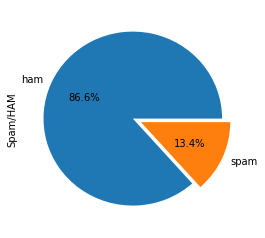

In [90]:
#Visualize using pie charts
dataset['catagory'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%',figsize=(4,4))
plt.ylabel('Spam/HAM')
plt.show()

Most of the messages are HAM in the dataset

In [91]:
#Visualise top HAM/SPAM words
ham_msg=dataset[dataset['catagory']=='ham']['msg']
spam_msg=dataset[dataset['catagory']=='spam']['msg']
spam_words=[]
ham_words=[]

def exSpamWords(spam_msgs):
    global spam_words
    words = [word.lower() for word in word_tokenize(spam_msgs) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def exHamWords(ham_msgs):
    global ham_words
    words = [word.lower() for word in word_tokenize(ham_msgs) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_msg.apply(exSpamWords)
spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(n = 10))

ham_msg.apply(exHamWords)
ham_words = np.array(ham_words)
print("\nTop 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(n = 10))


Top 10 Spam words are :

call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

Top 10 Ham words are :

u       974
gt      318
lt      316
get     301
ok      246
go      246
got     242
ur      237
know    234
like    231
dtype: int64


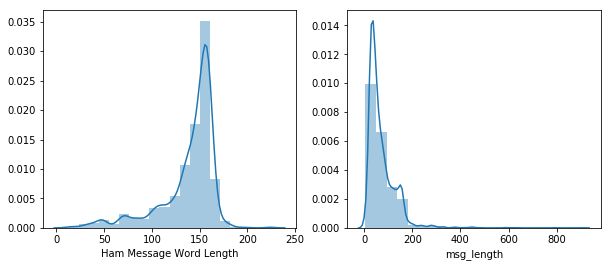

In [92]:
#Impact of length of messages to spam/ham
dataset['msg_length']=dataset['msg'].apply(len)

f, ax = plt.subplots(1, 2, figsize = (10, 4))

sns.distplot(dataset[dataset['catagory'] == 'spam']['msg_length'], bins = 20, ax = ax[0])
ax[0].set_xlabel('Spam Message Word Length')

sns.distplot(dataset[dataset['catagory'] == 'ham']['msg_length'], bins = 20, ax = ax[1])
ax[0].set_xlabel('Ham Message Word Length')

plt.show()


In [93]:
#Preprocessing/cleaning the data
#Encoding the msg catagory
dataset['catagory']=dataset['catagory'].map({'ham':0,'spam':1})

stemmer=SnowballStemmer('english')
def cleanText(message):
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    return " ".join(words)

dataset['msg']=dataset['msg'].apply(cleanText)
dataset.head(10)

,catagory,msg,msg_length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
5,1,freemsg hey darl 3 week word back id like fun ...,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurun...,160
8,1,winner valu network custom select receivea å£9...,158
9,1,mobil 11 month u r entitl updat latest colour ...,154


In [95]:
#Split dataset in independent and dependent variables
Y=dataset['catagory'].values

#Calculate features for X
#count_v = CountVectorizer(decode_error='ignore')
#X=count_v.fit_transform(dataset['msg'])

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
X = vec.fit_transform(dataset["msg"])
print(X.shape)

(5572, 7903)


In [97]:
#Splitting the training and test data
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,stratify=dataset['catagory'])

In [98]:
#Creation/Training of the model
model_mnNB=MultinomialNB()
model_mnNB.fit(Xtrain,Ytrain)
ypred=model_mnNB.predict(Xtest)

In [99]:
print("train score:", model_mnNB.score(Xtrain, Ytrain))
print("test score:", model_mnNB.score(Xtest, Ytest))

train score: 0.9766659187794481
test score: 0.9605381165919282


In [100]:
#See the messages classified wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,Ytest)
print(cm)

dataset['prediction']=model_mnNB.predict(X)
# things that should be spam
sneaky_spam = dataset[(dataset['prediction'] == 0) & (dataset['catagory'] == 1)]['msg']
print('\n\n=======Messages were actually spam but classified as not spam=====')
for msg in sneaky_spam:
  print(msg)

# things that should not be spam
print('\n\n=======Messages not actually spam but classified as spam=====')
not_actually_spam = dataset[(dataset['prediction'] == 1) & (dataset['catagory'] == 0)]['msg']
for msg in not_actually_spam:
  print(msg)


[[966  44]
 [  0 105]]


=======Messages were actually spam but classified as not spam=====
freemsg hey darl 3 week word back id like fun still tb ok xxx std chgs send å£150 rcv
sms ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end repli end sptv
hear new divorc barbi come ken stuff
want 2 get laid tonight want real dog locat sent direct 2 ur mob join uk largest dog network bt txting gravel 69888 nt ec2a 31pmsg150p
freemsg havent repli text im randi sexi femal live local luv hear u netcollex ltd 08700621170150p per msg repli stop end
custom servic annonc new year deliveri wait pleas call 07046744435 arrang deliveri
bangbab ur order way u receiv servic msg 2 download ur content u goto wap bangb tv ur mobil internetservic menu
uniqu enough find 30th august wwwareyouuniquecouk
u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur star sign e g horo ari
hey realli horni want chat see nake text hot 69698 text charg 150pm unsubscrib

# Using AdaBoost for the classification

In [104]:
from sklearn.ensemble import AdaBoostClassifier

model_adab = AdaBoostClassifier(n_estimators=100)
model_adab.fit(Xtrain, Ytrain)
print("Classification rate for AdaBoost:", model_adab.score(Xtest, Ytest))

Classification rate for AdaBoost: 0.9721973094170404


In [105]:
#See the messages classified wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,Ytest)
print(cm)

[[966  44]
 [  0 105]]


The accuracy for adaboost classifier is high. So Adaboost could be used for this spam classification